imports

In [16]:
import os
#only print error messages from tensorflow
import tensorflow as tf
import numpy as np
import math
import time
import pickle
import bz2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
import copy
from sklearn.metrics import mean_squared_error,mean_absolute_error
import scipy.optimize as opt

load data

In [ ]:
in_file = bz2.BZ2File("generated_data/full_generated_data.bz2",'rb')
data = pickle.load(in_file)
in_file.close()

print("data loaded")

In [238]:
x_test = np.asarray(data[2])
y_test = np.asarray(data[3])

In [239]:
#https://stackoverflow.com/questions/21566379/fitting-a-2d-gaussian-function-using-scipy-optimize-curve-fit-valueerror-and-m

In [243]:
def analytical_eq(xy,xo,yo,No,T):   
    x, y = xy
    out = (No/math.pi)*np.exp(-(x-xo)**2)*np.exp(-(y-yo)**2) + ((100000-No)/(2*math.pi*T))*np.exp((-(x-xo)**2)/(2*T))*np.exp((-(y-yo)**2)/(2*T))
    return out.ravel()

In [244]:
x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)

test_im_indx = 5

initial_guess = (0,0,1000,175)

new_im = x_test[test_im_indx].ravel()

popt, _ = opt.curve_fit(analytical_eq, (x, y), new_im, p0=initial_guess)

In [245]:
print(f"x_0: {popt[0]}, y_0: {popt[1]} , No: {popt[2]}, T: {popt[3]} ")

x_0: 0.9842135226765646, y_0: 2.2359943039779915 , No: 34881.00064092953, T: 117.60037165056207 


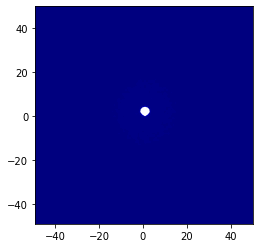

In [246]:
data_fitted = analytical_eq((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.imshow(new_im.reshape(100, 100), cmap=plt.cm.jet, origin='lower',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(100, 100), 12, colors='w')
plt.show()

In [247]:
y_test[test_im_indx]

array([  137.23553805, 38037.47934635])

In [254]:
initial_guess = (0,0,50000,175)
preds = []
for i,im in enumerate(x_test):
    popt, _ = opt.curve_fit(analytical_eq, (x, y), im.ravel(), p0=initial_guess)
    pred_No = popt[2]
    pred_T = popt[3]
    preds.append((pred_T,pred_No))
    if i % 50 == 0:
        print(i)

0
50


/var/folders/mv/_qj5ptxn15lgd6mszpsm5t000000gn/T/ipykernel_22613/117065190.py:3: RuntimeWarning: overflow encountered in multiply
  out = (No/math.pi)*np.exp(-(x-xo)**2)*np.exp(-(y-yo)**2) + ((100000-No)/(2*math.pi*T))*np.exp((-(x-xo)**2)/(2*T))*np.exp((-(y-yo)**2)/(2*T))
/var/folders/mv/_qj5ptxn15lgd6mszpsm5t000000gn/T/ipykernel_22613/117065190.py:3: RuntimeWarning: overflow encountered in exp
  out = (No/math.pi)*np.exp(-(x-xo)**2)*np.exp(-(y-yo)**2) + ((100000-No)/(2*math.pi*T))*np.exp((-(x-xo)**2)/(2*T))*np.exp((-(y-yo)**2)/(2*T))


100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950


In [255]:
preds = np.asarray(preds)
preds.shape

(4000, 2)

In [256]:
T_mse = mean_squared_error(preds[:,0],y_test[:,0],squared = False)

In [257]:
N_mse = mean_squared_error(preds[:,1],y_test[:,1],squared = False)

In [258]:
T_mse

118.40386378664346

In [259]:
N_mse

9568.305332064203